In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score, cross_val_predict
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, roc_auc_score, accuracy_score, roc_curve, auc, confusion_matrix
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from itertools import combinations
from sklearn.ensemble import StackingClassifier

In [52]:
data = pd.read_csv("/Users/robertoruizfelix/Downloads/breast_cancer_data.csv")
data.head()

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_worst  smoothness_worst  \
0  ...          17.33           184.60      2019.0            0.1622   
1  ...          23.41           158.80      1956.0            0.1238   
2  ...          25.53           152.50      1709.0            0.1444   
3  ...          26.50            98.87       567.7            0.2098   
4  ...          16.67           152.20      1575.0            0.1374   

   compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
0             0.6656           0.7119                0.2654          0.4601   
1             0.1866           0.2416                0.1860          0.2750   
2             0.4245           0.4504                0.2430          0.3613   
3             0.8663           0.6869                0.2575          0.6638   
4             0.2050           0.4000                0.1625          0.2364   

   fractal_dimension_worst  Unnamed: 32  
0                  0.11890          NaN  
1                  0.08902          NaN  
2                  0.08758          NaN  
3                  0.17300          NaN  
4                  0.07678          NaN  

[5 rows x 33 columns]

Ten real-valued features are computed for each cell nucleus:

	a) radius (mean of distances from center to points on the perimeter)
	b) texture (standard deviation of gray-scale values)
	c) perimeter
	d) area
	e) smoothness (local variation in radius lengths)
	f) compactness (perimeter^2 / area - 1.0)
	g) concavity (severity of concave portions of the contour)
	h) concave points (number of concave portions of the contour)
	i) symmetry 
	j) fractal dimension ("coastline approximation" - 1)

In [53]:
data = data.drop("id", axis = 1)
data = data.iloc[:, :-1]
data.head()

diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0         M        17.99         10.38          122.80     1001.0   
1         M        20.57         17.77          132.90     1326.0   
2         M        19.69         21.25          130.00     1203.0   
3         M        11.42         20.38           77.58      386.1   
4         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0         0.2419  ...         25.38          17.33           184.60   
1         0.1812  ...         24.99          23.41           158.80   
2         0.2069  ...         23.57          25.53           152.50   
3         0.2597  ...         14.91          26.50            98.87   
4         0.1809  ...         22.54          16.67           152.20   

   area_worst  smoothness_worst  compactness_worst  concavity_worst  \
0      2019.0            0.1622             0.6656           0.7119   
1      1956.0            0.1238             0.1866           0.2416   
2      1709.0            0.1444             0.4245           0.4504   
3       567.7            0.2098             0.8663           0.6869   
4      1575.0            0.1374             0.2050           0.4000   

   concave points_worst  symmetry_worst  fractal_dimension_worst  
0                0.2654          0.4601                  0.11890  
1                0.1860          0.2750                  0.08902  
2                0.2430          0.3613                  0.08758  
3                0.2575          0.6638                  0.17300  
4                0.1625          0.2364                  0.07678  

[5 rows x 31 columns]

# Exploratory Data Analysis (EDA)

In [54]:
missing_values = data.isnull().sum()
missing_values_table = pd.DataFrame(missing_values, columns=['Missing Values'])
missing_values_table['Percentage'] = (missing_values_table['Missing Values'] / len(data)) * 100

print(missing_values_table)

                         Missing Values  Percentage
diagnosis                             0         0.0
radius_mean                           0         0.0
texture_mean                          0         0.0
perimeter_mean                        0         0.0
area_mean                             0         0.0
smoothness_mean                       0         0.0
compactness_mean                      0         0.0
concavity_mean                        0         0.0
concave points_mean                   0         0.0
symmetry_mean                         0         0.0
fractal_dimension_mean                0         0.0
radius_se                             0         0.0
texture_se                            0         0.0
perimeter_se                          0         0.0
area_se                               0         0.0
smoothness_se                         0         0.0
compactness_se                        0         0.0
concavity_se                          0         0.0
concave poin

In [55]:
data['diagnosis'] = data['diagnosis'].map({'M':1, 'B':0})
data.describe()

diagnosis  radius_mean  texture_mean  perimeter_mean    area_mean  \
count  569.000000   569.000000    569.000000      569.000000   569.000000   
mean     0.372583    14.127292     19.289649       91.969033   654.889104   
std      0.483918     3.524049      4.301036       24.298981   351.914129   
min      0.000000     6.981000      9.710000       43.790000   143.500000   
25%      0.000000    11.700000     16.170000       75.170000   420.300000   
50%      0.000000    13.370000     18.840000       86.240000   551.100000   
75%      1.000000    15.780000     21.800000      104.100000   782.700000   
max      1.000000    28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%           0.086370          0.064920        0.029560             0.020310   
50%           0.095870          0.092630        0.061540             0.033500   
75%           0.105300          0.130400        0.130700             0.074000   
max           0.163400          0.345400        0.426800             0.201200   

       symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
count     569.000000  ...    569.000000     569.000000       569.000000   
mean        0.181162  ...     16.269190      25.677223       107.261213   
std         0.027414  ...      4.833242       6.146258        33.602542   
min         0.106000  ...      7.930000      12.020000        50.410000   
25%         0.161900  ...     13.010000      21.080000        84.110000   
50%         0.179200  ...     14.970000      25.410000        97.660000   
75%         0.195700  ...     18.790000      29.720000       125.400000   
max         0.304000  ...     36.040000      49.540000       251.200000   

        area_worst  smoothness_worst  compactness_worst  concavity_worst  \
count   569.000000        569.000000         569.000000       569.000000   
mean    880.583128          0.132369           0.254265         0.272188   
std     569.356993          0.022832           0.157336         0.208624   
min     185.200000          0.071170           0.027290         0.000000   
25%     515.300000          0.116600           0.147200         0.114500   
50%     686.500000          0.131300           0.211900         0.226700   
75%    1084.000000          0.146000           0.339100         0.382900   
max    4254.000000          0.222600           1.058000         1.252000   

       concave points_worst  symmetry_worst  fractal_dimension_worst  
count            569.000000      569.000000               569.000000  
mean               0.114606        0.290076                 0.083946  
std                0.065732        0.061867                 0.018061  
min                0.000000        0.156500                 0.055040  
25%                0.064930        0.250400                 0.071460  
50%                0.099930        0.282200                 0.080040  
75%                0.161400        0.317900                 0.092080  
max                0.291000        0.663800                 0.207500  

[8 rows x 31 columns]

# Statistical Analysis

## Correlation Matrix

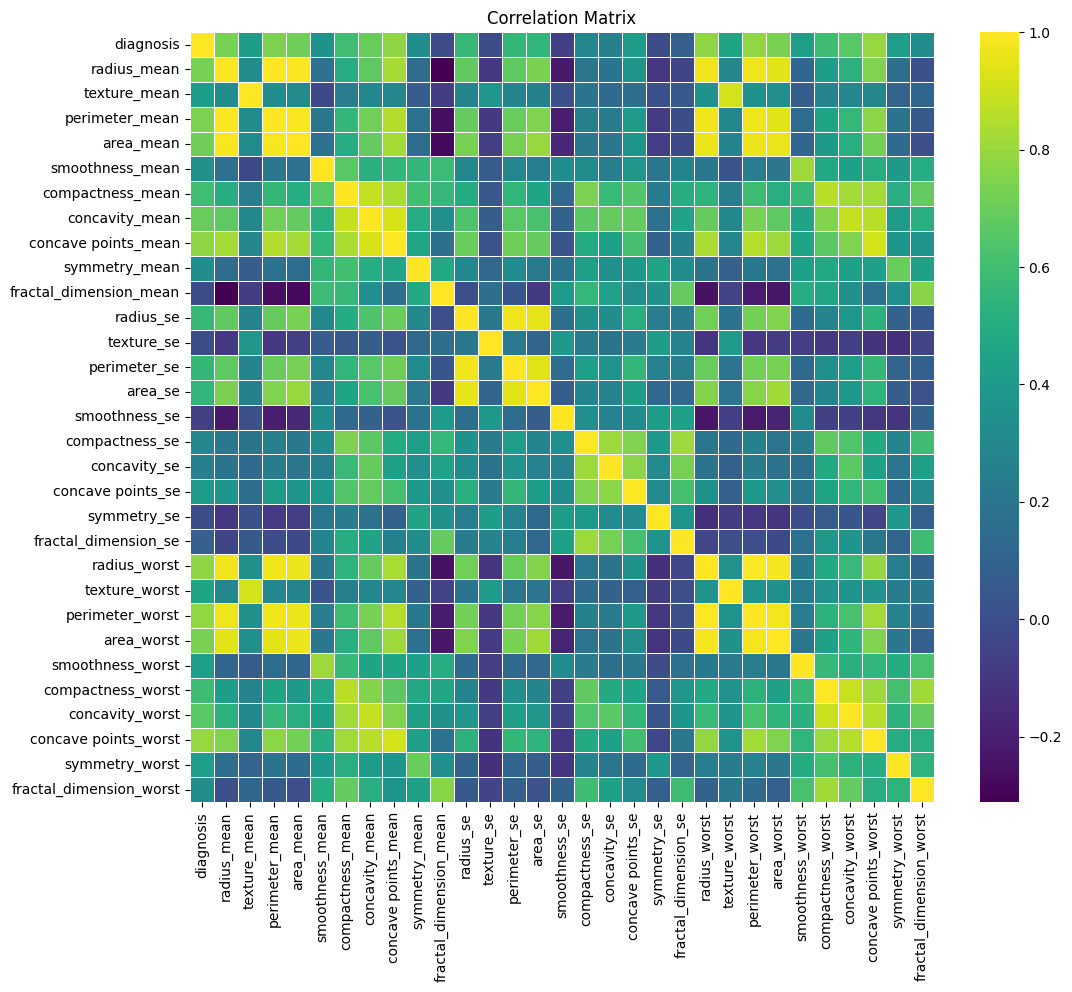

In [56]:
correlation_matrix = data.corr()  
plt.figure(figsize=(12, 10)) 
sns.heatmap(correlation_matrix, annot=False, cmap='viridis', linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

## PCA 

In [57]:
X = data.drop('diagnosis', axis=1) 
y = data['diagnosis']  

/var/folders/n3/fjyt97j951g_t23_1z8lwflw0000gn/T/ipykernel_27588/1415581344.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=[f'PCA{i+1}' for i in range(n_cmp)], y=pca.explained_variance_ratio_, palette='viridis')


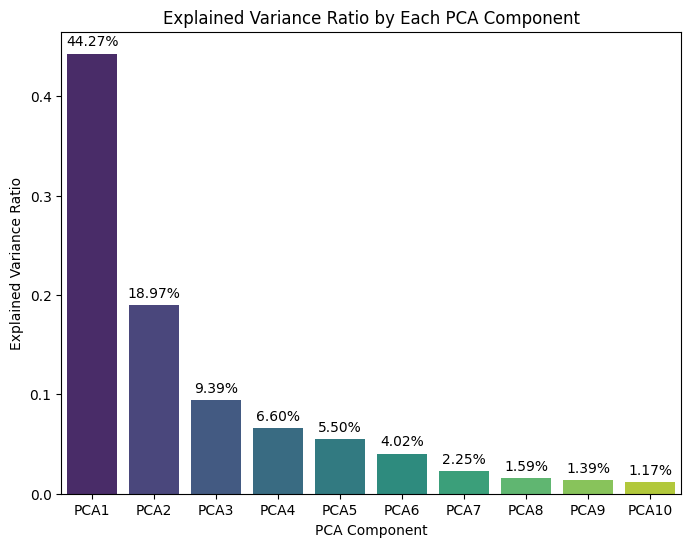

In [58]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

n_cmp = 10
pca = PCA(n_components=n_cmp) 
X_pca = pca.fit_transform(X_scaled)

pca_df = pd.DataFrame(X_pca, columns=[f'PCA{i+1}' for i in range(n_cmp)])
pca_df['diagnosis'] = y

plt.figure(figsize=(8, 6))
sns.barplot(x=[f'PCA{i+1}' for i in range(n_cmp)], y=pca.explained_variance_ratio_, palette='viridis')

for i, value in enumerate(pca.explained_variance_ratio_):
    plt.text(i, value + 0.005, f'{value*100:.2f}%', ha='center', va='bottom', fontsize=10)

plt.title('Explained Variance Ratio by Each PCA Component')
plt.xlabel('PCA Component')
plt.ylabel('Explained Variance Ratio')
plt.show()


      radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
PCA1     0.218902      0.103725        0.227537   0.220995         0.142590   
PCA2    -0.233857     -0.059706       -0.215181  -0.231077         0.186113   
PCA3    -0.008531      0.064550       -0.009314   0.028700        -0.104292   
PCA4     0.041409     -0.603050        0.041983   0.053434         0.159383   
PCA5     0.037786     -0.049469        0.037375   0.010331        -0.365089   

      compactness_mean  concavity_mean  concave points_mean  symmetry_mean  \
PCA1          0.239285        0.258400             0.260854       0.138167   
PCA2          0.151892        0.060165            -0.034768       0.190349   
PCA3         -0.074092        0.002734            -0.025564      -0.040240   
PCA4          0.031795        0.019123             0.065336       0.067125   
PCA5          0.011704        0.086375            -0.043861      -0.305941   

      fractal_dimension_mean  ...  radius_worst  texture

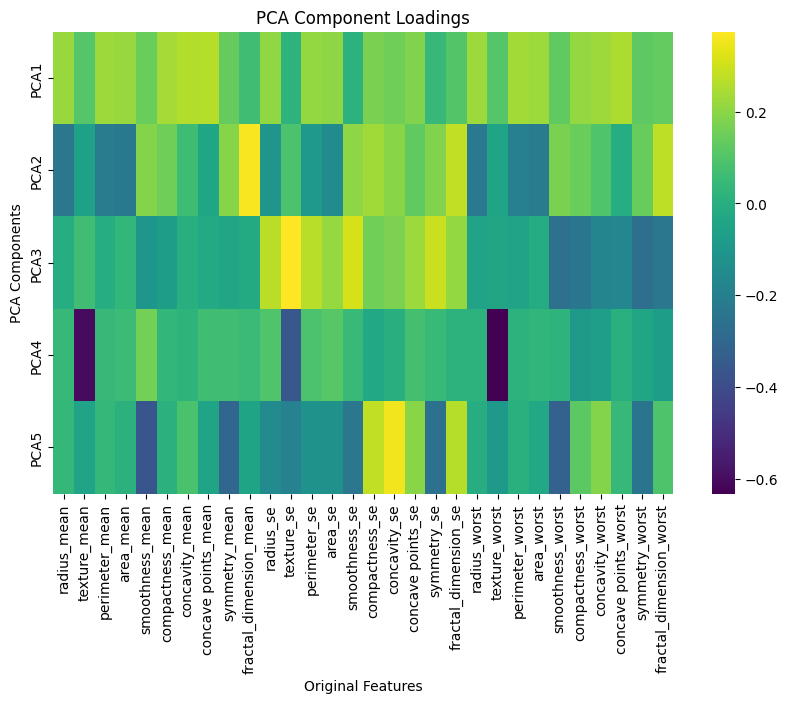

In [59]:
pca = PCA(n_components=5)  
X_pca = pca.fit_transform(X_scaled)

loadings = pca.components_

loadings_df = pd.DataFrame(loadings, columns=X.columns, index=[f'PCA{i+1}' for i in range(5)])

print(loadings_df)

plt.figure(figsize=(10, 6))
sns.heatmap(loadings_df, cmap='viridis', annot=False, fmt='.2f')
plt.title('PCA Component Loadings')
plt.xlabel('Original Features')
plt.ylabel('PCA Components')
plt.show()


## Class Imbalance

/var/folders/n3/fjyt97j951g_t23_1z8lwflw0000gn/T/ipykernel_27588/4216837879.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=diagnosis_counts.index, y=diagnosis_counts.values, palette='viridis')


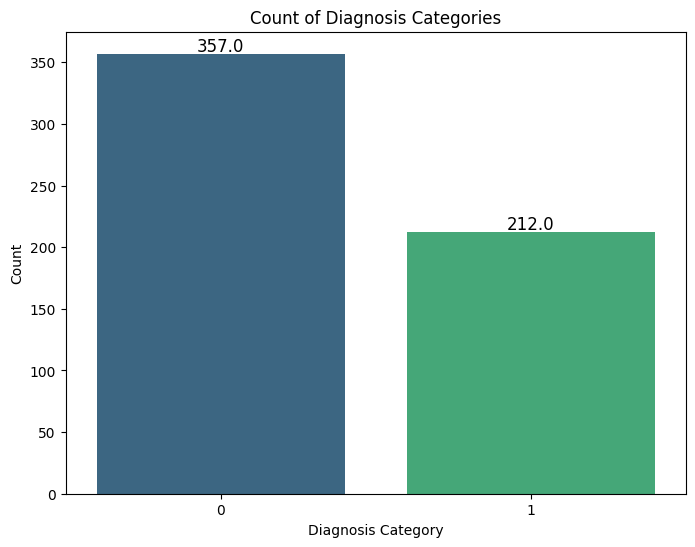

In [60]:
diagnosis_counts = data['diagnosis'].value_counts()

plt.figure(figsize=(8, 6))
ax = sns.barplot(x=diagnosis_counts.index, y=diagnosis_counts.values, palette='viridis')

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', 
                (p.get_x() + p.get_width() / 2., p.get_height() - 5), 
                ha='center', va='center', 
                fontsize=12, color='black', 
                xytext=(0, 10), textcoords='offset points')

plt.xlabel('Diagnosis Category')
plt.ylabel('Count')
plt.title('Count of Diagnosis Categories')
plt.show()

## Feature Importance

### Data Splitting

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [62]:
def plot_feature_importance(model, X, y, model_name):
    model.fit(X, y)
    
    if hasattr(model, 'feature_importances_'): 
        importances = model.feature_importances_
    elif hasattr(model, 'coef_'):  
        importances = np.abs(model.coef_.flatten())  
    
    feature_names = X.columns
    feature_importance_df = pd.DataFrame({
        'Feature': feature_names,
        'Importance': importances
    })
    
    feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
    
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')
    plt.title(f'Feature Importance from {model_name}')
    plt.show()
    
    # Print feature importance
    print(f"Feature Importance from {model_name}:")
    print(feature_importance_df)
    print("\n")


### Random Forest

/var/folders/n3/fjyt97j951g_t23_1z8lwflw0000gn/T/ipykernel_27588/999234849.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')


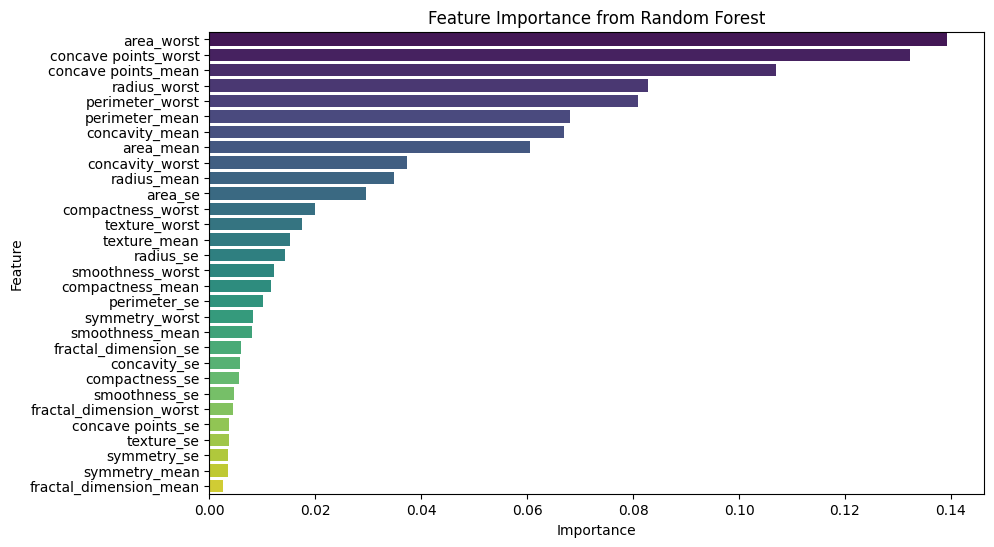

Feature Importance from Random Forest:
                    Feature  Importance
23               area_worst    0.139357
27     concave points_worst    0.132225
7       concave points_mean    0.107046
20             radius_worst    0.082848
22          perimeter_worst    0.080850
2            perimeter_mean    0.067990
6            concavity_mean    0.066917
3                 area_mean    0.060462
26          concavity_worst    0.037339
0               radius_mean    0.034843
13                  area_se    0.029553
25        compactness_worst    0.019864
21            texture_worst    0.017485
1              texture_mean    0.015225
10                radius_se    0.014264
24         smoothness_worst    0.012232
5          compactness_mean    0.011597
12             perimeter_se    0.010085
28           symmetry_worst    0.008179
4           smoothness_mean    0.007958
19     fractal_dimension_se    0.005942
16             concavity_se    0.005820
15           compactness_se    0.005612
1

In [63]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
plot_feature_importance(rf, X, y, 'Random Forest')


### XGBoost

/var/folders/n3/fjyt97j951g_t23_1z8lwflw0000gn/T/ipykernel_27588/999234849.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')


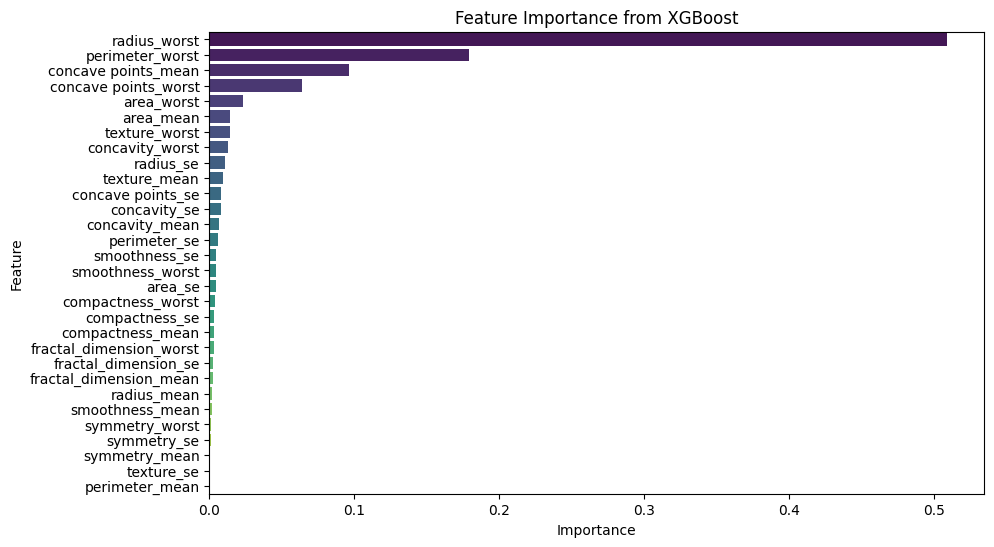

Feature Importance from XGBoost:
                    Feature  Importance
20             radius_worst    0.509064
22          perimeter_worst    0.178712
7       concave points_mean    0.096523
27     concave points_worst    0.063827
23               area_worst    0.023247
3                 area_mean    0.014423
21            texture_worst    0.014251
26          concavity_worst    0.012560
10                radius_se    0.010968
1              texture_mean    0.009300
17        concave points_se    0.008161
16             concavity_se    0.008142
6            concavity_mean    0.006467
12             perimeter_se    0.005616
14            smoothness_se    0.004747
24         smoothness_worst    0.004706
13                  area_se    0.004655
25        compactness_worst    0.003847
15           compactness_se    0.003512
5          compactness_mean    0.002854
29  fractal_dimension_worst    0.002835
19     fractal_dimension_se    0.002618
9    fractal_dimension_mean    0.002608
0      

In [64]:
xgb_model = xgb.XGBClassifier(random_state=42)
plot_feature_importance(xgb_model, X, y, 'XGBoost')


### Support Vector Machine (SVM)

/var/folders/n3/fjyt97j951g_t23_1z8lwflw0000gn/T/ipykernel_27588/999234849.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')


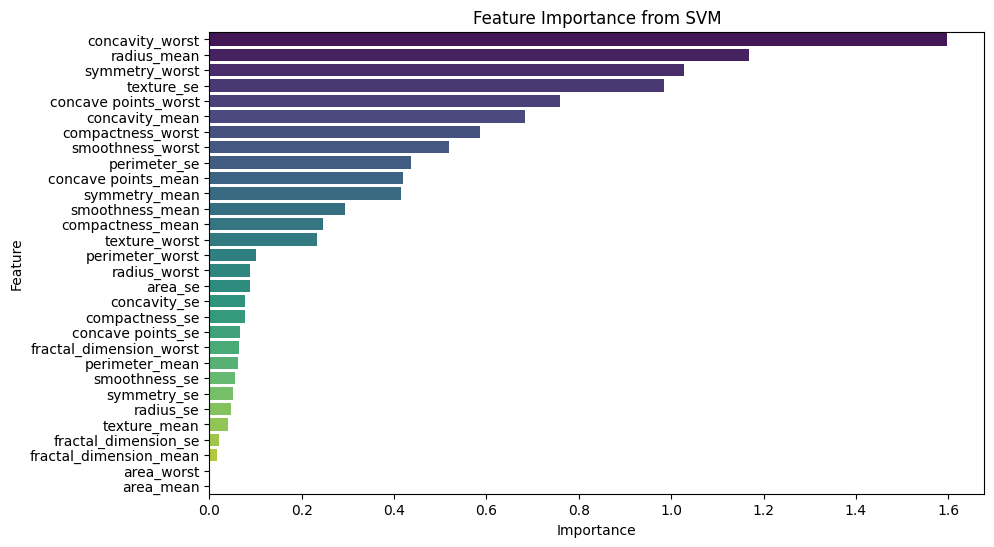

Feature Importance from SVM:
                    Feature  Importance
26          concavity_worst    1.598302
0               radius_mean    1.169144
28           symmetry_worst    1.027734
11               texture_se    0.985240
27     concave points_worst    0.758662
6            concavity_mean    0.683702
25        compactness_worst    0.585860
24         smoothness_worst    0.518794
12             perimeter_se    0.436551
7       concave points_mean    0.418965
8             symmetry_mean    0.415845
4           smoothness_mean    0.292605
5          compactness_mean    0.245075
21            texture_worst    0.232889
22          perimeter_worst    0.101176
20             radius_worst    0.087782
13                  area_se    0.087014
16             concavity_se    0.076276
15           compactness_se    0.076197
17        concave points_se    0.066707
29  fractal_dimension_worst    0.063709
2            perimeter_mean    0.060981
14            smoothness_se    0.054775
18         

In [65]:
svm_model = SVC(kernel='linear', random_state=42)
plot_feature_importance(svm_model, X, y, 'SVM')

### Logistic Regression

/var/folders/n3/fjyt97j951g_t23_1z8lwflw0000gn/T/ipykernel_27588/999234849.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')


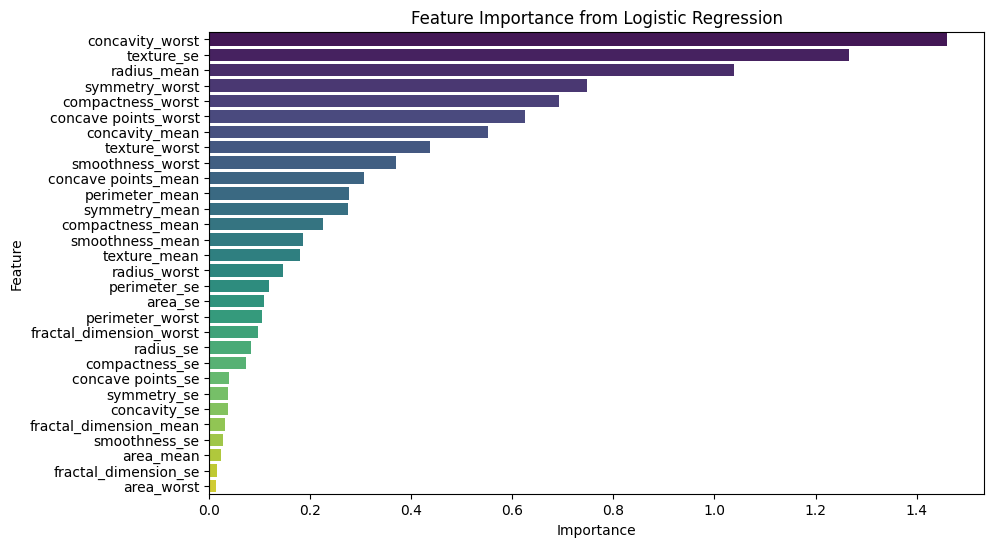

Feature Importance from Logistic Regression:
                    Feature  Importance
26          concavity_worst    1.461328
11               texture_se    1.265650
0               radius_mean    1.038392
28           symmetry_worst    0.746968
25        compactness_worst    0.692349
27     concave points_worst    0.624806
6            concavity_mean    0.552246
21            texture_worst    0.436634
24         smoothness_worst    0.369658
7       concave points_mean    0.306377
2            perimeter_mean    0.277035
8             symmetry_mean    0.274517
5          compactness_mean    0.224158
4           smoothness_mean    0.184547
1              texture_mean    0.180116
20             radius_worst    0.145512
12             perimeter_se    0.117182
13                  area_se    0.108773
22          perimeter_worst    0.103940
29  fractal_dimension_worst    0.095671
10                radius_se    0.082267
15           compactness_se    0.072692
17        concave points_se    0.03

In [66]:
lr_model = LogisticRegression(max_iter = 10000, random_state=42)
plot_feature_importance(lr_model, X, y, 'Logistic Regression')

## Aggregated Feature Importance

/var/folders/n3/fjyt97j951g_t23_1z8lwflw0000gn/T/ipykernel_27588/1786295294.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importance_df_normalized.index, y='MeanImportance', data=importance_df_normalized, palette='viridis')


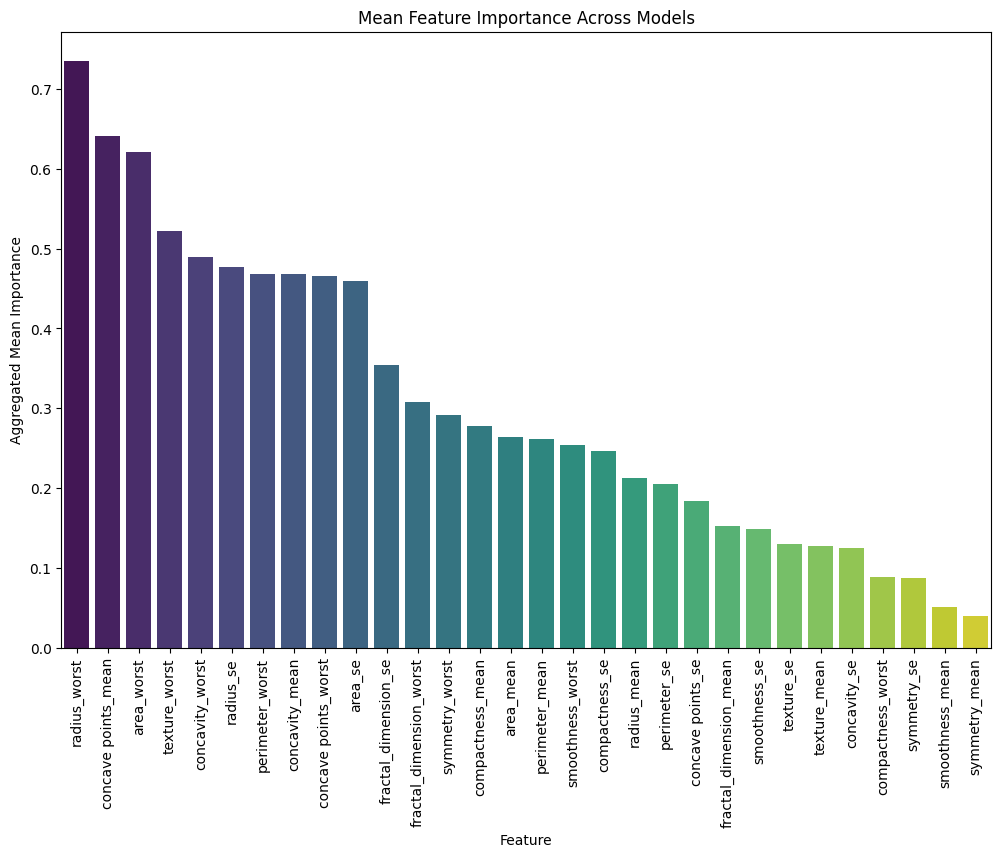

                         MeanImportance
radius_worst                   0.735269
concave points_mean            0.641000
area_worst                     0.621541
texture_worst                  0.522288
concavity_worst                0.489791
radius_se                      0.477435
perimeter_worst                0.468732
concavity_mean                 0.468013
concave points_worst           0.466250
area_se                        0.459462
fractal_dimension_se           0.354351
fractal_dimension_worst        0.307988
symmetry_worst                 0.291386
compactness_mean               0.277520
area_mean                      0.263774
perimeter_mean                 0.261682
smoothness_worst               0.253443
compactness_se                 0.246940
radius_mean                    0.211975
perimeter_se                   0.204767
concave points_se              0.183184
fractal_dimension_mean         0.152240
smoothness_se                  0.149078
texture_se                     0.130394


In [67]:
models = {
    'RandomForest': RandomForestClassifier(n_estimators=100, random_state=42),
    'XGBoost': xgb.XGBClassifier(random_state=42),
    'SVM': SVC(kernel='linear', random_state=42),  # Linear kernel for feature importance
    'LogisticRegression': LogisticRegression(max_iter=10000, random_state=42)
}

# IEmpty dictionary to store feature importances
feature_importances = {}

# Compute feature importance for each model
for model_name, model in models.items():
    model.fit(X_scaled, y)
    if hasattr(model, 'feature_importances_'):  
        importances = model.feature_importances_
    elif hasattr(model, 'coef_'):  
        importances = np.abs(model.coef_.flatten())  
    else: 
        importances = np.zeros(X.shape[1])
        
    feature_importances[model_name] = importances

importance_df = pd.DataFrame(feature_importances, index=X.columns)

importance_df_normalized = importance_df / importance_df.max()

importance_df_normalized['MeanImportance'] = importance_df_normalized.mean(axis=1)

importance_df_normalized = importance_df_normalized.sort_values(by='MeanImportance', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x=importance_df_normalized.index, y='MeanImportance', data=importance_df_normalized, palette='viridis')
plt.title('Mean Feature Importance Across Models')
plt.xlabel('Feature')
plt.ylabel('Aggregated Mean Importance')
plt.xticks(rotation=90) 
plt.show()

# Print the top features
print(importance_df_normalized[['MeanImportance']])

# Machine Learning

## General Models

--- RandomForest ---
Accuracy (Mean): 0.95824
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        58
           1       1.00      1.00      1.00        33

    accuracy                           1.00        91
   macro avg       1.00      1.00      1.00        91
weighted avg       1.00      1.00      1.00        91



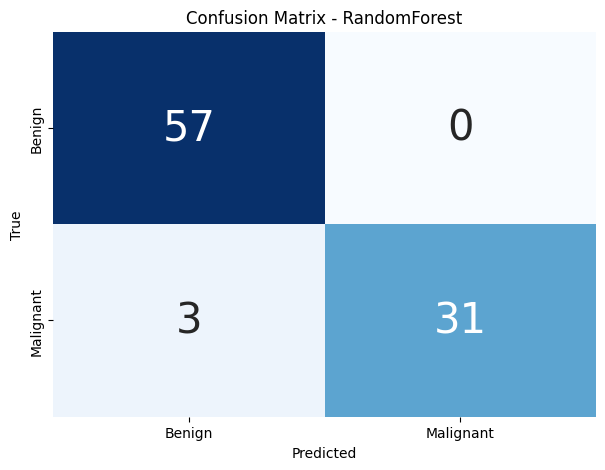

--- XGBoost ---
Accuracy (Mean): 0.96264
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        58
           1       1.00      0.97      0.98        33

    accuracy                           0.99        91
   macro avg       0.99      0.98      0.99        91
weighted avg       0.99      0.99      0.99        91



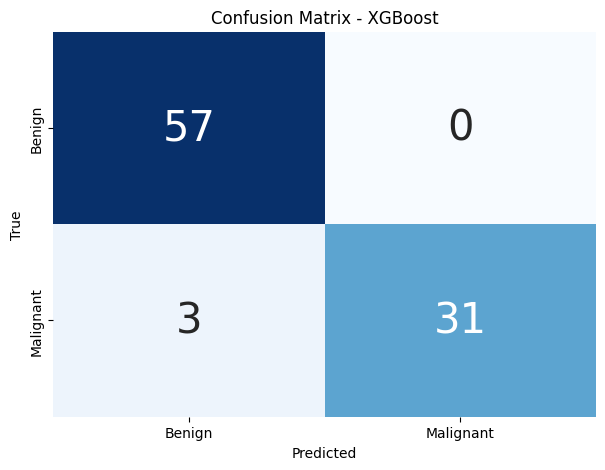

--- SVM ---
Accuracy (Mean): 0.94725
              precision    recall  f1-score   support

           0       0.95      1.00      0.97        58
           1       1.00      0.91      0.95        33

    accuracy                           0.97        91
   macro avg       0.98      0.95      0.96        91
weighted avg       0.97      0.97      0.97        91



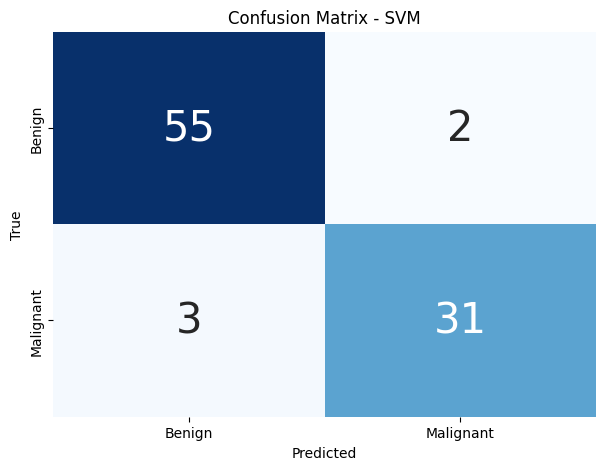

--- KNN ---
Accuracy (Mean): 0.92088
              precision    recall  f1-score   support

           0       0.97      1.00      0.98        58
           1       1.00      0.94      0.97        33

    accuracy                           0.98        91
   macro avg       0.98      0.97      0.98        91
weighted avg       0.98      0.98      0.98        91



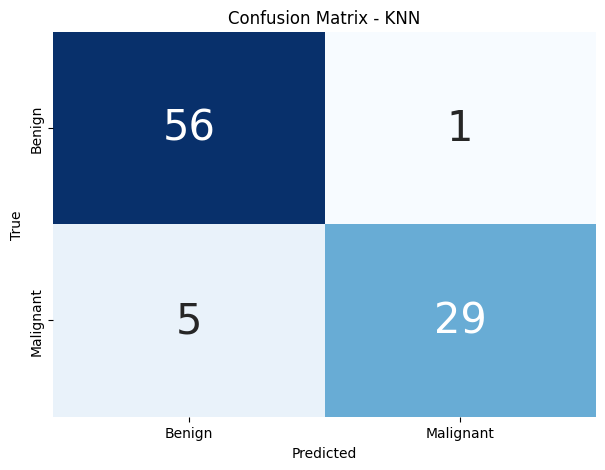

In [71]:
models = {
    'RandomForest': RandomForestClassifier(random_state=42),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    'SVM': SVC(kernel='linear', probability=True, random_state=42),
    'KNN': KNeighborsClassifier()
}

# Set up cross-validation with 5 folds
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Dictionary to store metrics
metrics = {}

# Loop through models
for model_name, model in models.items():
    auc_scores = []
    accuracies = []
    classification_reports = []
    
    # Cross-validation loop
    for train_index, test_index in cv.split(X_train, y_train):
        # Split data using the correct indexing (using row indices, not columns)
        X_train_fold, X_test_fold = X_train.iloc[train_index], X_train.iloc[test_index]
        y_train_fold, y_test_fold = y_train.iloc[train_index], y_train.iloc[test_index]
        
        # Fit the model on the current training fold
        model.fit(X_train_fold, y_train_fold)
        
        # Predict class labels
        y_pred = model.predict(X_test_fold)
        
        # Calculate accuracy
        accuracy = accuracy_score(y_test_fold, y_pred)
        
        # Store metrics
        accuracies.append(accuracy)
        classification_reports.append(classification_report(y_test_fold, y_pred, zero_division=0))
    
    # Store mean results for the model
    metrics[model_name] = {
        'Accuracy (mean)': np.mean(accuracies),
        'Classification Report': classification_reports[0],  # We can take the first fold's classification report
    }

    # Print metrics
    print(f"--- {model_name} ---")
    print(f"Accuracy (Mean): {np.mean(accuracies):.5f}")
    print(metrics[model_name]['Classification Report'])
    
    # Plot confusion matrix for the last fold
    cm = confusion_matrix(y_test_fold, y_pred)
    plt.figure(figsize=(7, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'],
                cbar=False, annot_kws={"size": 30})
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(f'Confusion Matrix - {model_name}')
    plt.show()

--- RandomForest ---
              precision    recall  f1-score   support

           0       0.96      0.99      0.97        71
           1       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114

Accuracy: 0.96491
AUC: 0.99525


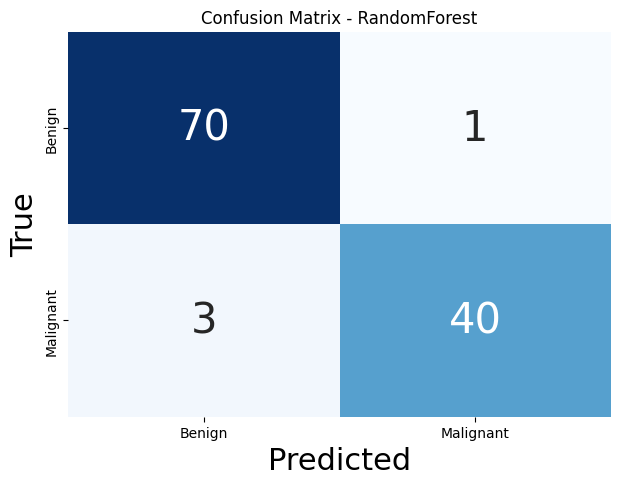

--- XGBoost ---
              precision    recall  f1-score   support

           0       0.96      0.97      0.97        71
           1       0.95      0.93      0.94        43

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114

Accuracy: 0.95614
AUC: 0.99083


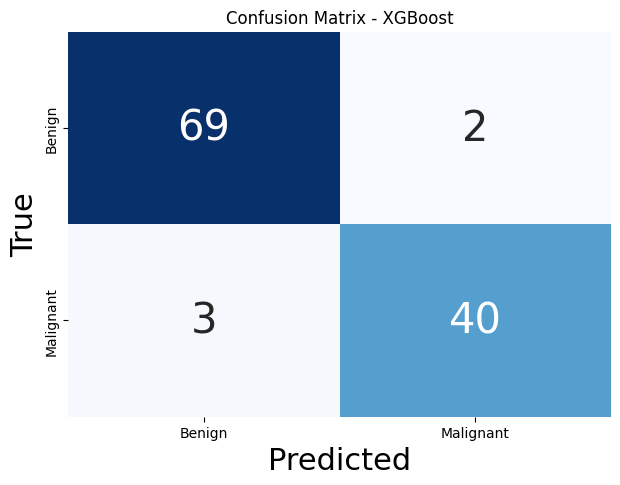

--- SVM ---
              precision    recall  f1-score   support

           0       0.95      0.99      0.97        71
           1       0.97      0.91      0.94        43

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114

Accuracy: 0.95614
AUC: 0.99574


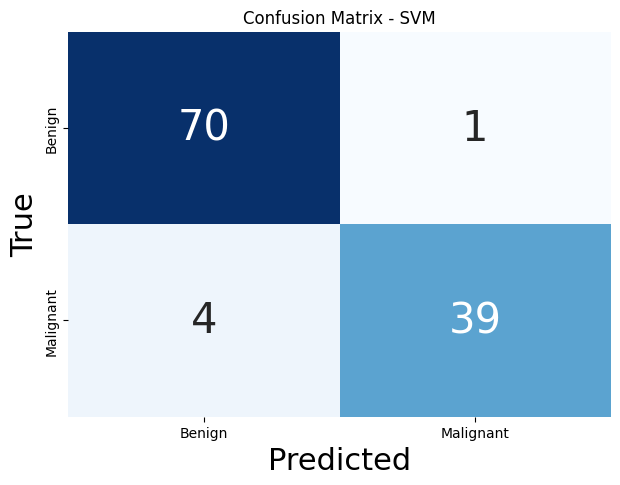

--- KNN ---
              precision    recall  f1-score   support

           0       0.93      1.00      0.97        71
           1       1.00      0.88      0.94        43

    accuracy                           0.96       114
   macro avg       0.97      0.94      0.95       114
weighted avg       0.96      0.96      0.96       114

Accuracy: 0.95614
AUC: 0.99591


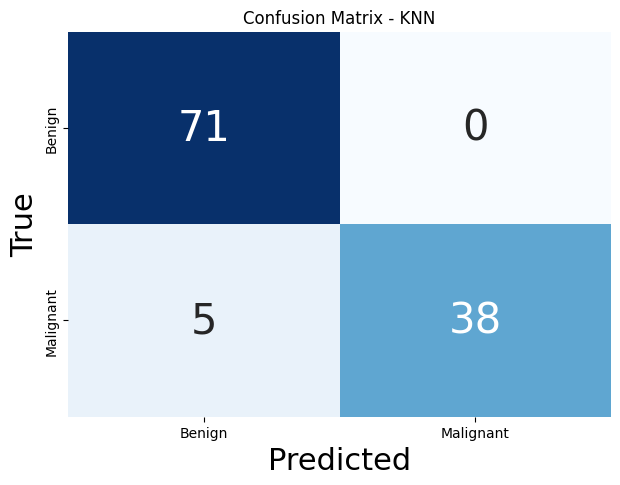

In [98]:
## NO FIVE FOLD CV
models = {
    'RandomForest': RandomForestClassifier(random_state=42),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    'SVM': SVC(kernel='linear', probability=True, random_state=42),
    'KNN': KNeighborsClassifier()
}

metrics = {}
for model_name, model in models.items():
    # Fit the model
    model.fit(X_train, y_train)
    
    # Predict the class labels
    y_pred = model.predict(X_test)
    
    # AUC calculation if predict_proba is available
    if hasattr(model, 'predict_proba'):
        y_proba = model.predict_proba(X_test)[:, 1]  # Probability of positive class
        auc_score = roc_auc_score(y_test, y_proba)
    elif hasattr(model, 'decision_function'):  # For models like SVM with decision_function
        y_scores = model.decision_function(X_test)
        auc_score = roc_auc_score(y_test, y_scores)
    else:
        auc_score = None

    # Store metrics for each model
    metrics[model_name] = {
        'Classification Report': classification_report(y_test, y_pred, zero_division=0),
        'AUC': auc_score
    }
    
    # Print classification report and AUC for the model
    print(f"--- {model_name} ---")
    print(metrics[model_name]['Classification Report'])

    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy:.5f}")

    
    if auc_score is not None:
        print(f"AUC: {auc_score:.5f}")
    else:
        print("AUC: Not available (model does not provide probability or decision scores)")
    
    # Compute and plot the confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    
    plt.figure(figsize=(7, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'],
                cbar = False, annot_kws={"size": 30}
    )
    plt.xlabel('Predicted', fontsize = 22)
    plt.ylabel('True', fontsize = 22)
    plt.title(f'Confusion Matrix - {model_name}')
    plt.show()

## Random Forest

In [19]:
rf_params = {
    'n_estimators': list(range(50, 401, 50)),  # Step of 50 between 50 and 400
    'max_depth': [None] + list(range(10, 31, 5)),  
    'min_samples_split': list(range(2, 11)),  # Step of 2 between 2 and 1
    'min_samples_leaf': list(range(1, 11))  # Step of 1 between 1 and 11
}
rf_grid = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=rf_params,
    scoring='roc_auc',
    cv=5,
    verbose=2,
    n_jobs=-1
)
rf_grid.fit(X_train, y_train)

best_rf = rf_grid.best_estimator_
print(f"Best Random Forest Parameters: {rf_grid.best_params_}")
# Best Random Forest Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 200}

Fitting 5 folds for each of 4320 candidates, totalling 21600 fits
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max

AUC: 0.99607
Accuracy: 0.96491
--- Classification Report - Hypertuned Random Forest ---
              precision    recall  f1-score   support

           0       0.96      0.99      0.97        71
           1       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



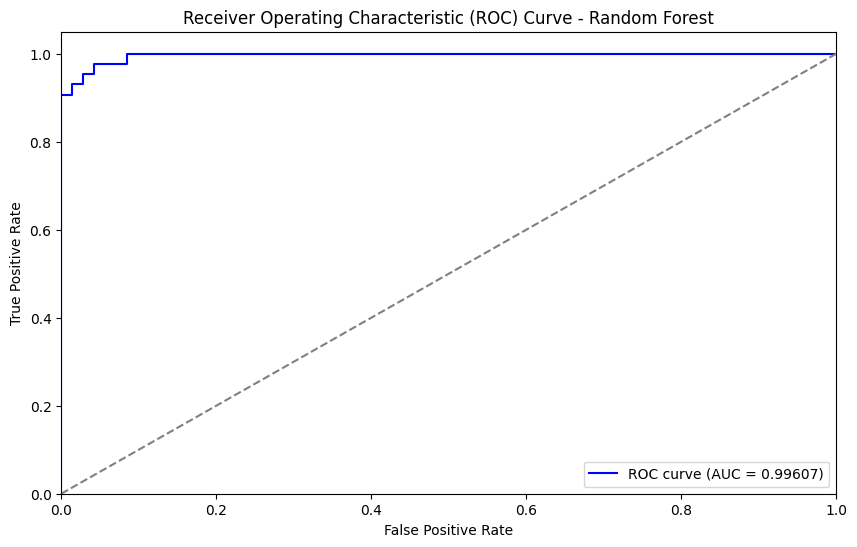

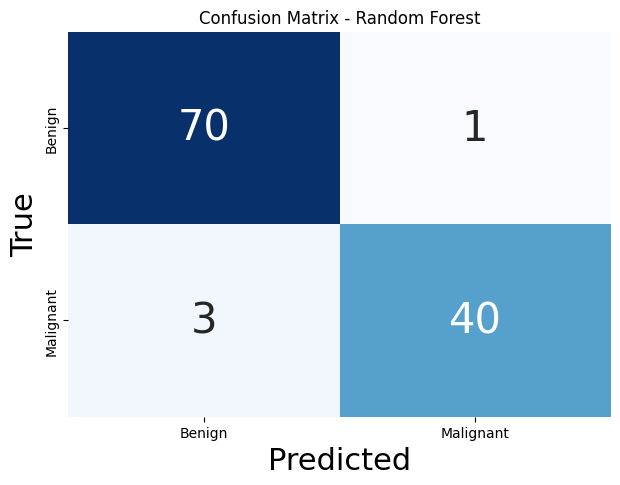

In [94]:
y_probs_rf = best_rf.predict_proba(X_test)[:, 1]  # Probabilities for the positive class
y_pred_rf = best_rf.predict(X_test)  # Predicted class labels

# Compute the ROC curve
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_probs_rf)

# Compute AUC
roc_auc_rf = auc(fpr_rf, tpr_rf)
print(f"AUC: {roc_auc_rf:.5f}")

accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Accuracy: {accuracy_rf:.5f}")

print("--- Classification Report - Hypertuned Random Forest ---")
print(classification_report(y_test, y_pred_rf))

# Plot the ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr_rf, tpr_rf, color='blue', label=f'ROC curve (AUC = {roc_auc_rf:.5f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line (random classifier)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Random Forest')
plt.legend(loc='lower right')
plt.show()

# Compute the confusion matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)

# Plot the confusion matrix using seaborn heatmap
plt.figure(figsize=(7, 5))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'],
            cbar = False, annot_kws={"size": 30})
plt.xlabel('Predicted', fontsize = 22)
plt.ylabel('True', fontsize = 22)
plt.title('Confusion Matrix - Random Forest')
plt.show()


## XGBoost

In [21]:
xgb_params = {
    'n_estimators': np.arange(100, 501, 50).tolist(),  # Steps of 100
    'learning_rate': np.linspace(0.01, 0.2, 6).tolist(),  # 6 evenly spaced values
    'max_depth': list(range(3, 11, 2)),  # Odd depths between 3 and 9
    'subsample': np.linspace(0.5, 1.0, 4).tolist(), 
    'colsample_bytree': np.linspace(0.5, 1.0, 4).tolist()  
}
grid_search = GridSearchCV(
    estimator=xgb_model,
    param_grid=xgb_params,
    scoring='roc_auc',  
    cv=5,  # 
    verbose=2,  
    n_jobs=-1 
)

grid_search.fit(X_train, y_train)

best_xgb = grid_search.best_estimator_
print(f"Best XGBoost Parameters: {grid_search.best_params_}")
# Best XGBoost Parameters: {'colsample_bytree': 0.5, 'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 350, 'subsample': 0.5}


Fitting 5 folds for each of 3456 candidates, totalling 17280 fits
[CV] END colsample_bytree=0.5, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.5; total time=   0.1s
[CV] END colsample_bytree=0.5, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.6666666666666666; total time=   0.0s
[CV] END colsample_bytree=0.5, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.5; total time=   0.0s
[CV] END colsample_bytree=0.5, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.5; total time=   0.1s
[CV] END colsample_bytree=0.5, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.6666666666666666; total time=   0.0s
[CV] END colsample_bytree=0.5, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.5; total time=   0.1s
[CV] END colsample_bytree=0.5, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.5; total time=   0.1s
[CV] END colsample_bytree=0.5, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=

AUC: 0.99181
--- Classification Report - Hypertuned XGboost ---
              precision    recall  f1-score   support

           0       0.96      0.99      0.97        71
           1       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114

Accuracy: 0.96491


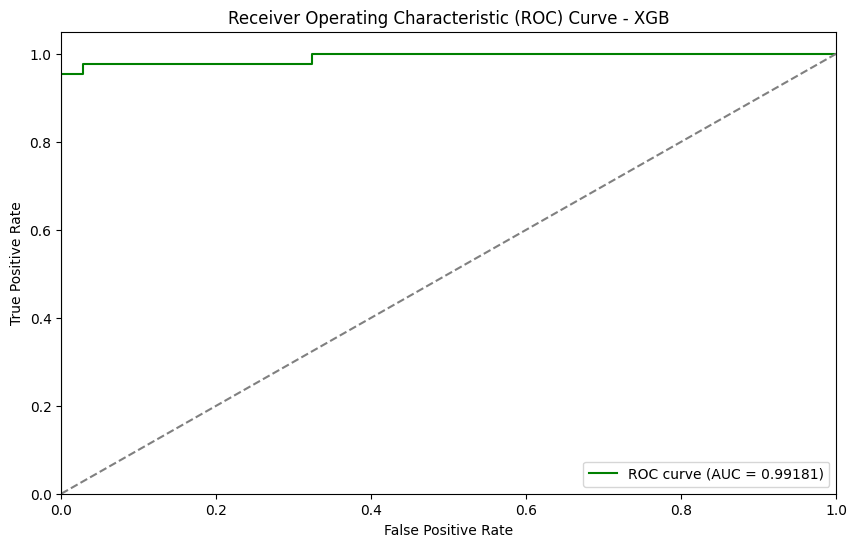

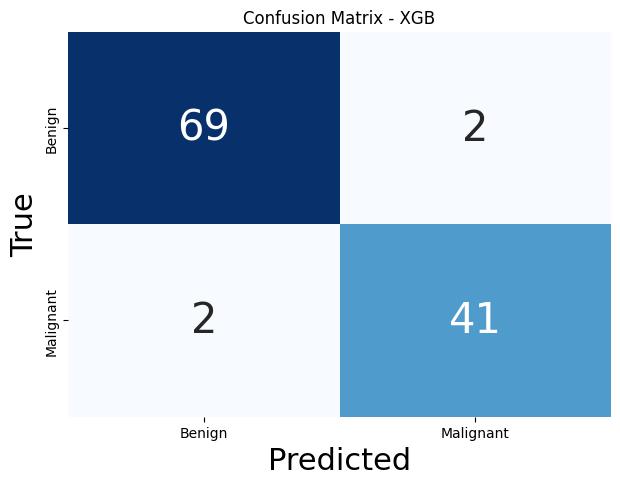

In [95]:
y_probs_xgb = best_xgb.predict_proba(X_test)[:, 1]  # Probabilities for the positive class
y_pred_xgb = best_xgb.predict(X_test)  # Predicted class labels

# Compute the ROC curve
fpr_xgb, tpr_xgb, thresholds_xgb = roc_curve(y_test, y_probs_xgb)

# Compute AUC for XGB
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)
print(f"AUC: {roc_auc_xgb:.5f}")

print("--- Classification Report - Hypertuned XGboost ---")
print(classification_report(y_test, y_pred_rf))


accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print(f"Accuracy: {accuracy_xgb:.5f}")

# Plot ROC curve for XGB
plt.figure(figsize=(10, 6))
plt.plot(fpr_xgb, tpr_xgb, color='green', label=f'ROC curve (AUC = {roc_auc_xgb:.5f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line (random classifier)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - XGB')
plt.legend(loc='lower right')
plt.show()

# Compute the confusion matrix
cm_xgb = confusion_matrix(y_test, y_pred_xgb)

# Plot the confusion matrix using seaborn heatmap
plt.figure(figsize=(7, 5))
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Blues', xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'],
            cbar = False, annot_kws={"size": 30})
plt.xlabel('Predicted', fontsize = 22)
plt.ylabel('True', fontsize = 22)
plt.title('Confusion Matrix - XGB')
plt.show()

## SVM

In [23]:
svm_params = {
    'C': np.logspace(-1, 2, 4).tolist(),  
    'kernel': ['linear', 'rbf'], 
    'gamma': np.logspace(-2, 1, 4).tolist()  
}
svm_model = SVC(random_state=42, probability=True)

grid_search = GridSearchCV(
    estimator=svm_model,
    param_grid=svm_params,
    scoring='roc_auc',  
    cv=5,  
    verbose=2,  # Print detailed output
    n_jobs=-1  
)

grid_search.fit(X_train, y_train)

best_svm = grid_search.best_estimator_
print(f"Best SVM Parameters: {grid_search.best_params_}")
# Best SVM Parameters: {'C': 100.0, 'gamma': 0.01, 'kernel': 'linear'}

Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV] END ......................C=0.1, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ......................C=0.1, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ......................C=0.1, gamma=0.01, kernel=rbf; total time=   0.1s
[CV] END ......................C=0.1, gamma=0.01, kernel=rbf; total time=   0.1s
[CV] END ......................C=0.1, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ...................C=0.1, gamma=0.01, kernel=linear; total time=   0.3s
[CV] END ...................C=0.1, gamma=0.01, kernel=linear; total time=   0.4s
[CV] END ...................C=0.1, gamma=0.01, kernel=linear; total time=   0.4s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ...................C=0.1, gamma=0.01, kernel=linear; total time=   0.5s
[CV] END .......................C=0.1, gamma=0.

AUC: 0.98854
--- Classification Report - Hypertuned SVM ---
              precision    recall  f1-score   support

           0       0.96      0.99      0.97        71
           1       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114

Accuracy: 0.94737


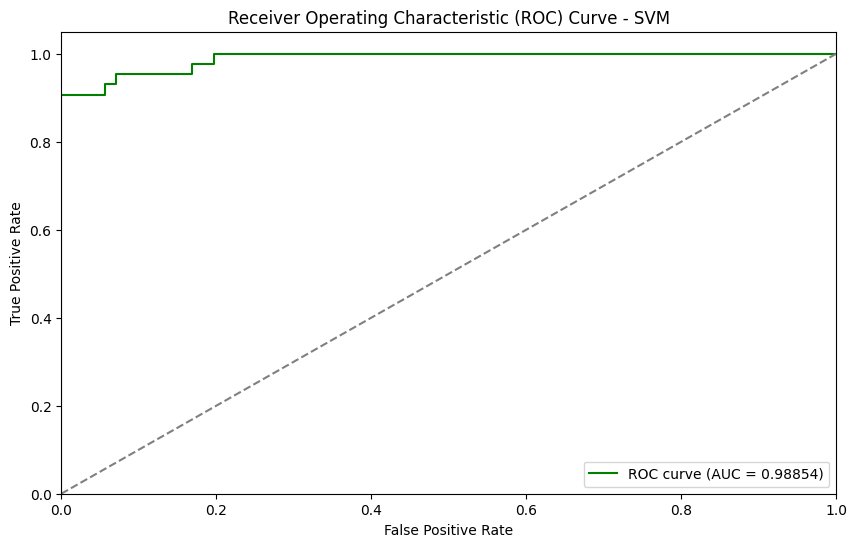

Text(0.5, 1.0, 'Confusion Matrix - SVM')

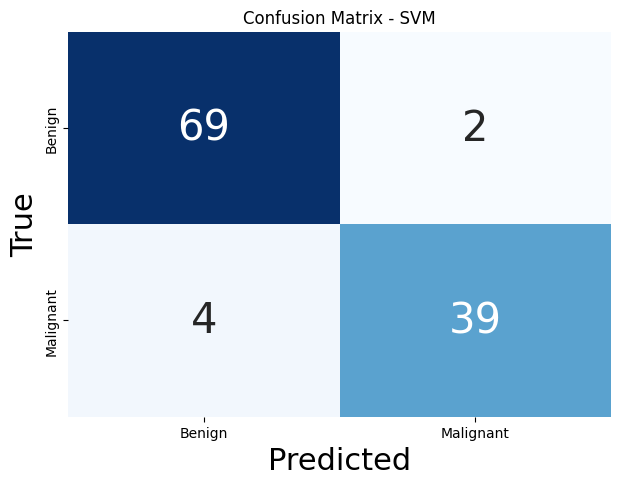

In [96]:
y_probs_svm = best_svm.predict_proba(X_test)[:, 1]  # Probabilities for the positive class
y_pred_svm = best_svm.predict(X_test)  # Predicted class labels

# Compute the ROC curve
fpr_svm, tpr_svm, thresholds_svm = roc_curve(y_test, y_probs_svm)

# Compute AUC
roc_auc_svm = auc(fpr_svm, tpr_svm)
print(f"AUC: {roc_auc_svm:.5f}")

print("--- Classification Report - Hypertuned SVM ---")
print(classification_report(y_test, y_pred_rf))


accuracy_xgb = accuracy_score(y_test, y_pred_svm)
print(f"Accuracy: {accuracy_xgb:.5f}")

# Plot ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr_svm, tpr_svm, color='green', label=f'ROC curve (AUC = {roc_auc_svm:.5f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line (random classifier)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - SVM')
plt.legend(loc='lower right')
plt.show()

# Compute the confusion matrix
cm_svm = confusion_matrix(y_test, y_pred_svm)

# Plot confusion matrix
plt.figure(figsize=(7, 5))
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Blues', xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'],
            cbar = False, annot_kws={"size": 30})
plt.xlabel('Predicted', fontsize = 22)
plt.ylabel('True', fontsize = 22)
plt.title('Confusion Matrix - SVM')

## K-Nearest Neighbors

In [ ]:
knn_params = {
    'n_neighbors': list(range(3, 51, 2)), 
    'weights': ['uniform', 'distance'],  
    'metric': ['euclidean', 'manhattan', 'minkowski'],  # Common distance metrics
    'p': [1, 2]
}

knn_model = KNeighborsClassifier()

grid_search_knn = GridSearchCV(
    estimator=knn_model,
    param_grid=knn_params,
    scoring='roc_auc',  
    cv=5,  
    verbose=2, 
    n_jobs=-1 
)

grid_search_knn.fit(X_train, y_train)

best_knn = grid_search_knn.best_estimator_
print(f"Best KNN Parameters: {grid_search_knn.best_params_}")
# Best KNN Parameters: {'metric': 'manhattan', 'n_neighbors': 27, 'p': 1, 'weights': 'distance'}


Fitting 5 folds for each of 288 candidates, totalling 1440 fits
[CV] END metric=euclidean, n_neighbors=3, p=1, weights=uniform; total time=   0.0s
[CV] END metric=euclidean, n_neighbors=3, p=1, weights=uniform; total time=   0.0s
[CV] END metric=euclidean, n_neighbors=3, p=1, weights=uniform; total time=   0.0s
[CV] END metric=euclidean, n_neighbors=3, p=1, weights=uniform; total time=   0.0s
[CV] END metric=euclidean, n_neighbors=3, p=1, weights=distance; total time=   0.0s
[CV] END metric=euclidean, n_neighbors=3, p=1, weights=distance; total time=   0.0s
[CV] END metric=euclidean, n_neighbors=3, p=1, weights=uniform; total time=   0.0s
[CV] END metric=euclidean, n_neighbors=3, p=1, weights=distance; total time=   0.0s
[CV] END metric=euclidean, n_neighbors=3, p=2, weights=uniform; total time=   0.0s
[CV] END metric=euclidean, n_neighbors=3, p=2, weights=uniform; total time=   0.0s
[CV] END metric=euclidean, n_neighbors=3, p=2, weights=uniform; total time=   0.0s
[CV] END metric=eucl

AUC: 0.99705
--- Classification Report - Hypertuned kNN ---
              precision    recall  f1-score   support

           0       0.96      0.99      0.97        71
           1       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114

Accuracy: 0.95614


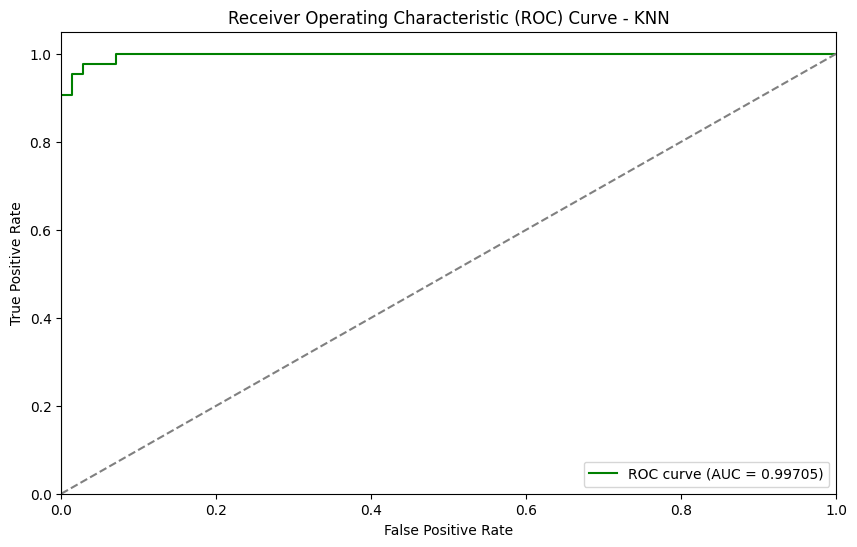

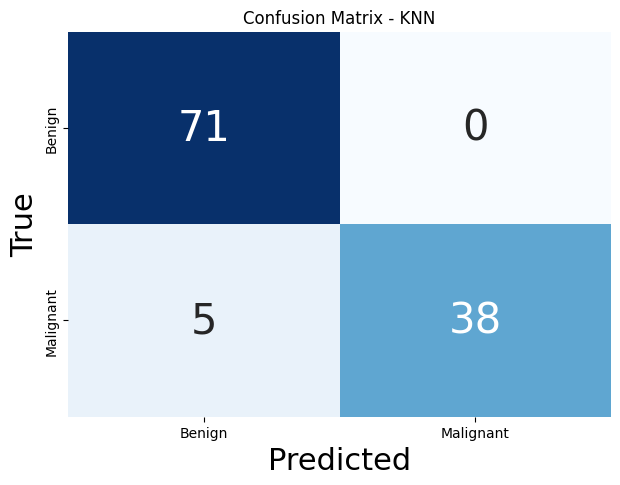

In [97]:
y_probs_knn = best_knn.predict_proba(X_test)[:, 1]  # Probabilities for the positive class
y_pred_knn = best_knn.predict(X_test)  # Predicted class labels

# Compute the ROC curve
fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_test, y_probs_knn)

# Compute AUC for KNN
roc_auc_knn = auc(fpr_knn, tpr_knn)
print(f"AUC: {roc_auc_knn:.5f}")

print("--- Classification Report - Hypertuned kNN ---")
print(classification_report(y_test, y_pred_rf))


accuracy_xgb = accuracy_score(y_test, y_pred_knn)
print(f"Accuracy: {accuracy_xgb:.5f}")

# Plot ROC curve for KNN
plt.figure(figsize=(10, 6))
plt.plot(fpr_knn, tpr_knn, color='green', label=f'ROC curve (AUC = {roc_auc_knn:.5f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line (random classifier)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - KNN')
plt.legend(loc='lower right')
plt.show()

# Compute the confusion matrix
cm_knn = confusion_matrix(y_test, y_pred_knn)

# Plot the confusion matrix using seaborn heatmap
plt.figure(figsize=(7, 5))
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Blues', xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'],
            cbar = False, annot_kws={"size": 30})
plt.xlabel('Predicted', fontsize = 22)
plt.ylabel('True', fontsize = 22)
plt.title('Confusion Matrix - KNN')
plt.show()

# Model Stacking

## Model Settings (Optimized vs not)

--- Pair: RandomForest & XGBoost ---
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        71
           1       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114

AUC: 0.9967
Accuracy: 0.97368


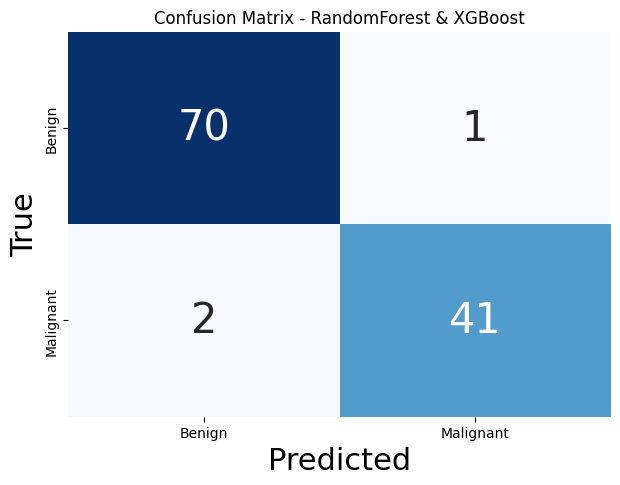

--- Pair: RandomForest & KNN ---
              precision    recall  f1-score   support

           0       0.96      0.99      0.97        71
           1       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114

AUC: 0.9971
Accuracy: 0.96491


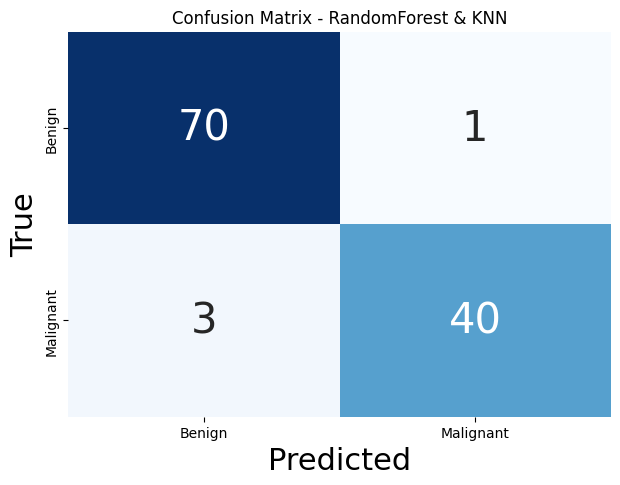

--- Pair: RandomForest & SVM ---
              precision    recall  f1-score   support

           0       0.96      0.99      0.97        71
           1       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114

AUC: 0.9938
Accuracy: 0.96491


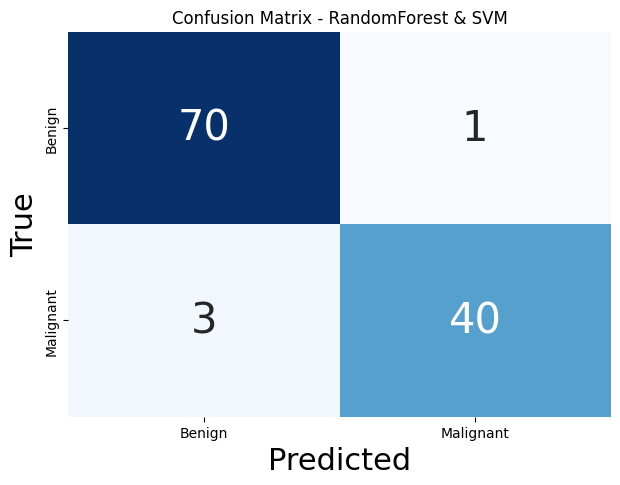

--- Pair: XGBoost & KNN ---
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        71
           1       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114

AUC: 0.9980
Accuracy: 0.97368


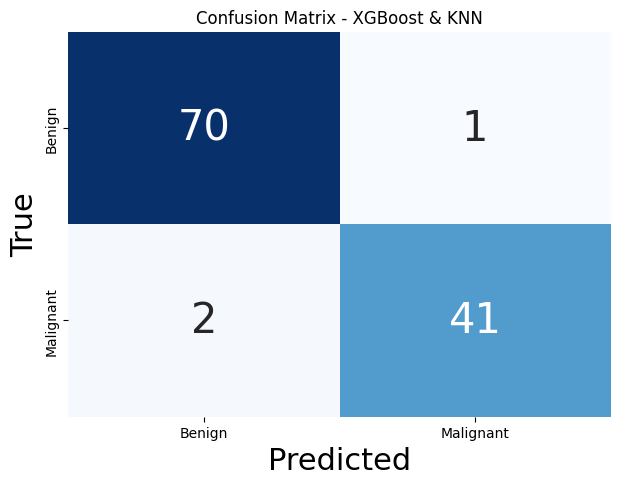

--- Pair: XGBoost & SVM ---
              precision    recall  f1-score   support

           0       0.97      1.00      0.99        71
           1       1.00      0.95      0.98        43

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114

AUC: 0.9938
Accuracy: 0.98246


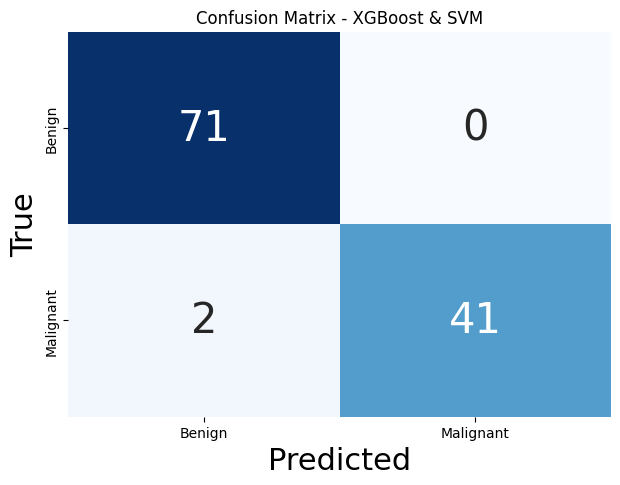

--- Pair: KNN & SVM ---
              precision    recall  f1-score   support

           0       0.95      0.99      0.97        71
           1       0.97      0.91      0.94        43

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114

AUC: 0.9934
Accuracy: 0.95614


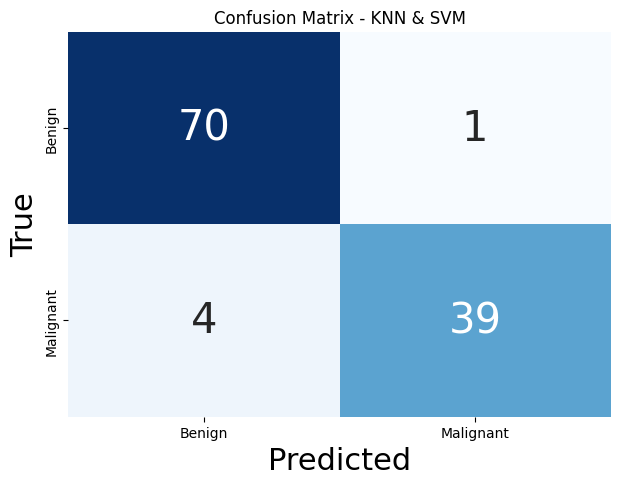

In [101]:
models = {
    'RandomForest': RandomForestClassifier(
        max_depth=None,
        min_samples_leaf=1,
        min_samples_split=3,
        n_estimators=200,
        random_state=42
    ),
    'XGBoost': XGBClassifier(
        colsample_bytree=0.5,
        learning_rate=0.2,
        max_depth=3,
        n_estimators=350,
        subsample=0.5,
        use_label_encoder=False,
        eval_metric='logloss',
        random_state=42
    ),
    'KNN': KNeighborsClassifier(
        metric='manhattan',
        n_neighbors=27,
        p=1,
        weights='distance'
    ),
    'SVM': SVC(
        kernel='linear', 
        probability=True,
        C=100,
        gamma=0.01, 
        random_state=42)
}

# Define the meta-model (Logistic Regression)
meta_model = LogisticRegression(random_state=42)

# Initialize an empty dictionary to store the metrics for each pair of models
pair_metrics = {}

# Loop through combinations of model pairs
for (model_name_1, model_name_2) in combinations(models.keys(), 2):
    # Get the two models
    model_1 = models[model_name_1]
    model_2 = models[model_name_2]
    
    # Create a stacking model with the two models
    base_models = [(model_name_1, model_1), (model_name_2, model_2)]
    stacking_model = StackingClassifier(estimators=base_models, final_estimator=meta_model)
    
    # Train the stacking model
    stacking_model.fit(X_train, y_train)
    
    # Predict using the stacking model
    y_pred = stacking_model.predict(X_test)
    
    # If the model supports predict_proba, calculate AUC
    if hasattr(stacking_model, 'predict_proba'):
        y_proba = stacking_model.predict_proba(X_test)[:, 1]  # Probability of positive class
        auc_score = roc_auc_score(y_test, y_proba)
    else:
        auc_score = None
    
    # Store metrics for this pair
    pair_metrics[(model_name_1, model_name_2)] = {
        'Classification Report': classification_report(y_test, y_pred),
        'AUC': auc_score
    }
    
    # Print the metrics for this pair
    print(f"--- Pair: {model_name_1} & {model_name_2} ---")
    print(pair_metrics[(model_name_1, model_name_2)]['Classification Report'])
    if auc_score:
        print(f"AUC: {auc_score:.4f}")
    else:
        print("AUC: Not available (no predict_proba method)")

    # Confusion Matrix for this pair
    cm = confusion_matrix(y_test, y_pred)

    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy:.5f}")  
    
    # Plot the confusion matrix
    plt.figure(figsize=(7, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'],
                cbar = False, annot_kws={"size": 30})
    plt.xlabel('Predicted', fontsize = 22)
    plt.ylabel('True', fontsize = 22)
    plt.title(f'Confusion Matrix - {model_name_1} & {model_name_2}')
    plt.show()

### RF Meta model

--- Pair: RandomForest & XGBoost ---
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        71
           1       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114

AUC: 0.9808
Accuracy: 0.97368


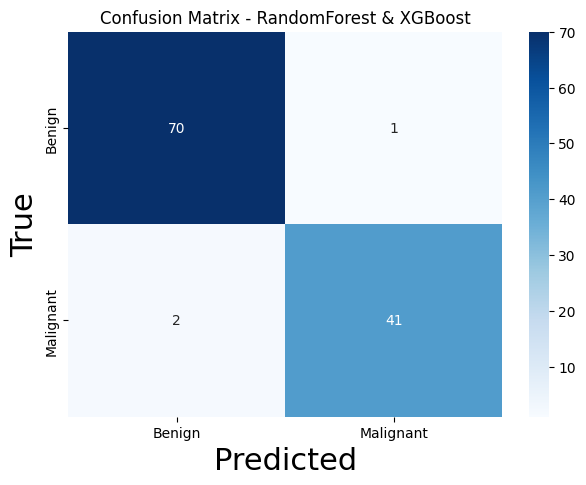

--- Pair: RandomForest & KNN ---
              precision    recall  f1-score   support

           0       0.96      0.97      0.97        71
           1       0.95      0.93      0.94        43

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114

AUC: 0.9905
Accuracy: 0.95614


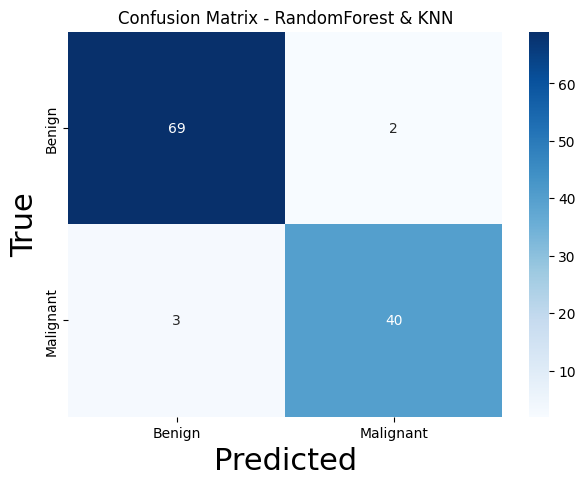

--- Pair: RandomForest & SVM ---
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        71
           1       1.00      0.93      0.96        43

    accuracy                           0.97       114
   macro avg       0.98      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114

AUC: 0.9805
Accuracy: 0.97368


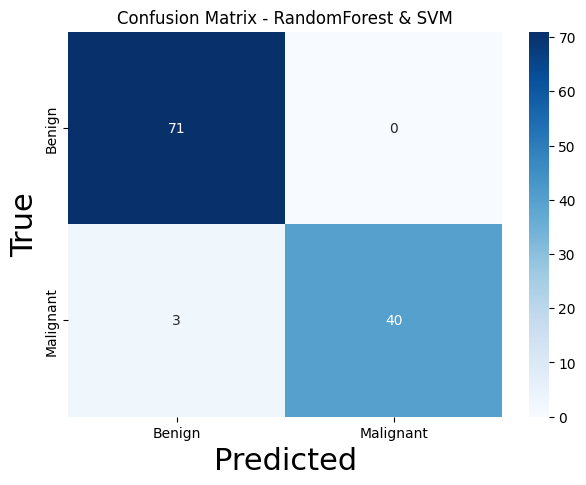

--- Pair: XGBoost & KNN ---
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        71
           1       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114

AUC: 0.9941
Accuracy: 0.97368


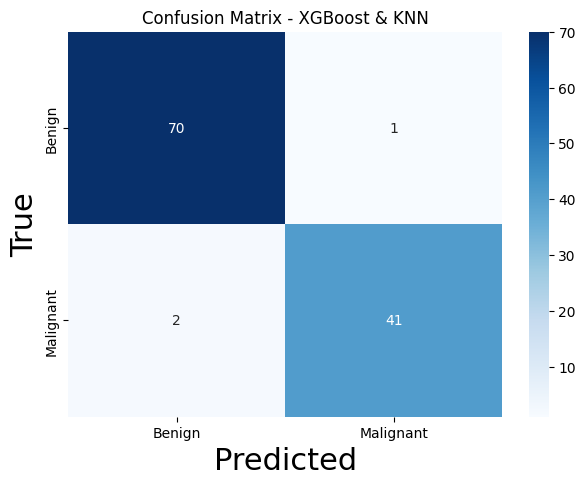

--- Pair: XGBoost & SVM ---
              precision    recall  f1-score   support

           0       0.96      0.99      0.97        71
           1       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114

AUC: 0.9841
Accuracy: 0.96491


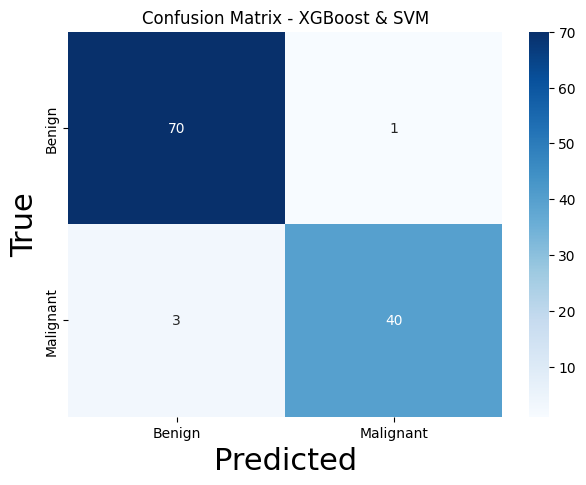

--- Pair: KNN & SVM ---
              precision    recall  f1-score   support

           0       0.96      0.94      0.95        71
           1       0.91      0.93      0.92        43

    accuracy                           0.94       114
   macro avg       0.93      0.94      0.93       114
weighted avg       0.94      0.94      0.94       114

AUC: 0.9836
Accuracy: 0.93860


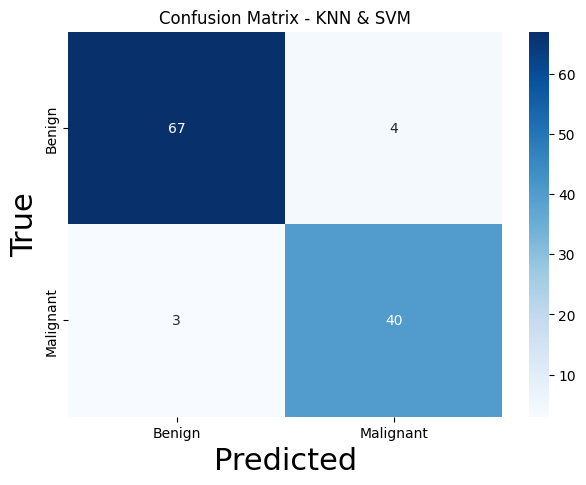

In [102]:
models = {
    'RandomForest': RandomForestClassifier(
        max_depth=None,
        min_samples_leaf=1,
        min_samples_split=3,
        n_estimators=200,
        random_state=42
    ),
    'XGBoost': XGBClassifier(
        colsample_bytree=0.5,
        learning_rate=0.2,
        max_depth=3,
        n_estimators=350,
        subsample=0.5,
        use_label_encoder=False,
        eval_metric='logloss',
        random_state=42
    ),
    'KNN': KNeighborsClassifier(
        metric='manhattan',
        n_neighbors=27,
        p=1,
        weights='distance'
    ),
    'SVM': SVC(
        kernel='linear', 
        probability=True,
        C=100,
        gamma=0.01, 
        random_state=42)
}

# Define the meta-model (Random Forest)
meta_model = meta_model = RandomForestClassifier(
    n_estimators=200,
    min_samples_leaf=1,
    min_samples_split=3, 
    max_depth=None,    
    random_state=42    
)

# Initialize an empty dictionary to store the metrics for each pair of models
pair_metrics = {}

# Loop through combinations of model pairs
for (model_name_1, model_name_2) in combinations(models.keys(), 2):
    # Get the two models
    model_1 = models[model_name_1]
    model_2 = models[model_name_2]
    
    # Create a stacking model with the two models
    base_models = [(model_name_1, model_1), (model_name_2, model_2)]
    stacking_model = StackingClassifier(estimators=base_models, final_estimator=meta_model)
    
    # Train the stacking model
    stacking_model.fit(X_train, y_train)
    
    # Predict using the stacking model
    y_pred = stacking_model.predict(X_test)
    
    # If the model supports predict_proba, calculate AUC
    if hasattr(stacking_model, 'predict_proba'):
        y_proba = stacking_model.predict_proba(X_test)[:, 1]  # Probability of positive class
        auc_score = roc_auc_score(y_test, y_proba)
    else:
        auc_score = None
    
    # Store metrics for this pair
    pair_metrics[(model_name_1, model_name_2)] = {
        'Classification Report': classification_report(y_test, y_pred),
        'AUC': auc_score
    }
    
    # Print the metrics for this pair
    print(f"--- Pair: {model_name_1} & {model_name_2} ---")
    print(pair_metrics[(model_name_1, model_name_2)]['Classification Report'])
    if auc_score:
        print(f"AUC: {auc_score:.4f}")
    else:
        print("AUC: Not available (no predict_proba method)")

    # Confusion Matrix for this pair
    cm = confusion_matrix(y_test, y_pred)

    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy:.5f}")  
    
    # Plot the confusion matrix
    plt.figure(figsize=(7, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
    plt.xlabel('Predicted', fontsize = 22)
    plt.ylabel('True', fontsize = 22)
    plt.title(f'Confusion Matrix - {model_name_1} & {model_name_2}')
    plt.show()